In [50]:
from glob import glob
images_paths = sorted(glob("/home/yasin/projeler/forpaper/rgb*"))
gtdepths_paths = sorted(glob("/home/yasin/projeler/forpaper/depth*"))
maskspaths =  sorted(glob("/home/yasin/projeler/results/mask*"))
maskspaths = maskspaths[:1] + maskspaths[3:] + maskspaths[1:3]
gtdisparity_paths = sorted(glob("/home/yasin/projeler/results/depth*"))
gtdisparity_paths = gtdisparity_paths[:1] + gtdisparity_paths[3:] + gtdisparity_paths[1:3]
gtdisparity_paths_fpga = sorted(glob("/home/yasin/projeler/results_fpga/depth*"))
gtdisparity_paths_fpga = gtdisparity_paths_fpga[:1] + gtdisparity_paths_fpga[3:] + gtdisparity_paths_fpga[1:3]
fpgadepths_paths = sorted(glob("/home/yasin/projeler/results_fpga/pred*"))
fpgadepths_paths = fpgadepths_paths[:1] + fpgadepths_paths[3:] + fpgadepths_paths[1:3]
cpudepths_paths = sorted(glob("/home/yasin/projeler/results/pred*"))
cpudepths_paths = cpudepths_paths[:1] + cpudepths_paths[3:] + cpudepths_paths[1:3]
metric3ddepths_path = sorted(glob("/home/yasin/projeler/results_metric3d/depth*"))
metric3ddepths_path = metric3ddepths_path[:2] + metric3ddepths_path[4:] + metric3ddepths_path[2:4]

In [ ]:
from glob import glob
images_paths = sorted(glob("../data/rgb*"))
gtdepths_paths = sorted(glob("../data/depth*"))
fpgadepths_paths = sorted(glob("../outputs/fpga*"))
cpudepths_paths = sorted(glob("../outputs/cpu*"))

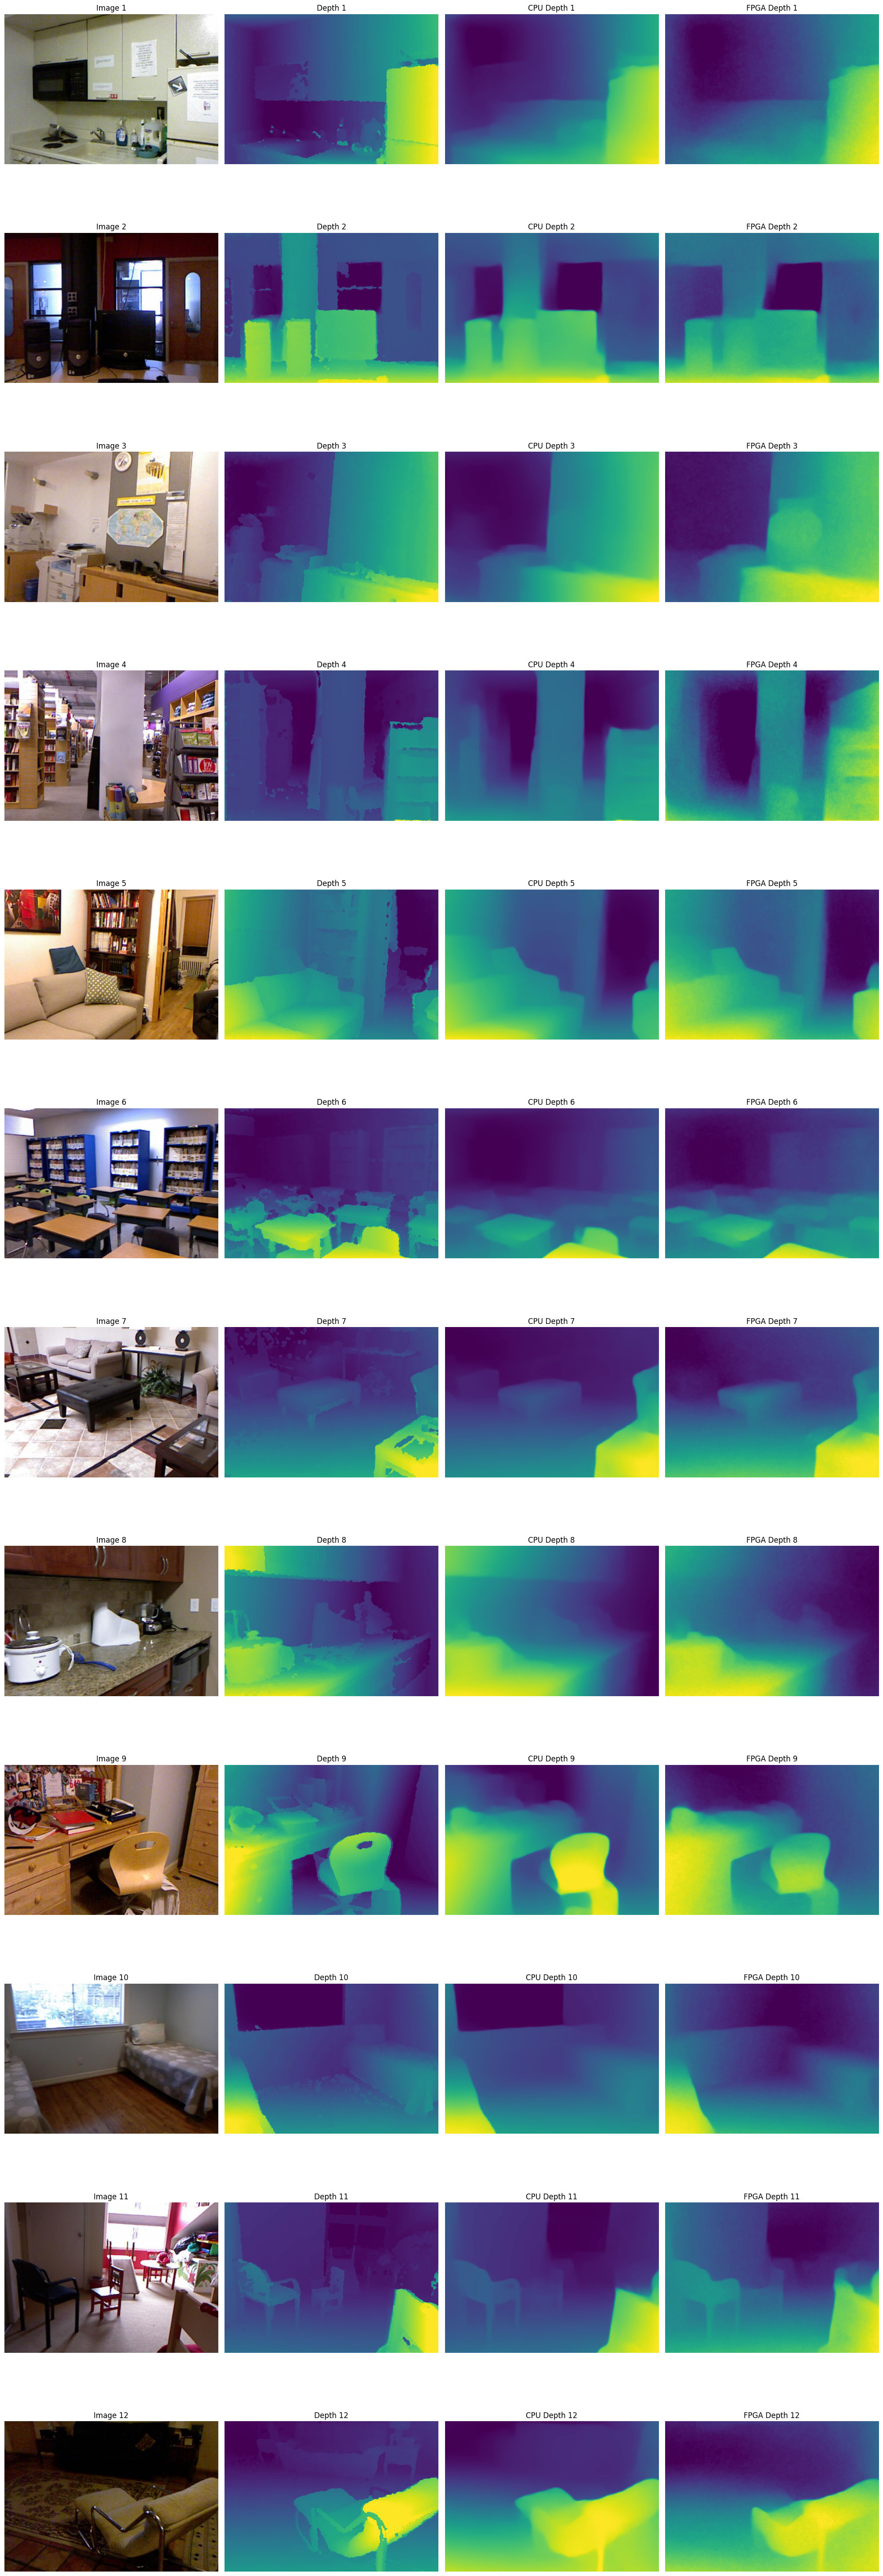

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Number of rows and columns
rows = 12
cols = 4


def clip_image(image, clip_size=50):
    return image[clip_size:-clip_size, clip_size:-clip_size]


# Initialize the figure
fig, axes = plt.subplots(rows, cols, figsize=(20, 60))

# Loop through each row
for i in range(rows):
    # Load the images
    image = plt.imread(images_paths[i])
    #depth = np.load(gtdepths_paths[i])
    mask = np.squeeze(np.load(maskspaths[i]))
    depth = np.load(gtdisparity_paths[i])
    cpu_depth = np.load(cpudepths_paths[i])
    depth[mask==0] = cpu_depth[mask==0]
    fpga_depth = np.load(fpgadepths_paths[i])

    #image = clip_image(image)  
    #depth = clip_image(depth) 
    #cpu_depth = clip_image(cpu_depth)
    #fpga_depth = clip_image(fpga_depth) 

    # Find the common min and max for this row
    percentile_min = 2
    percentile_max = 98
    
    vmin = np.percentile(depth, percentile_min)
    vmax = np.percentile(depth, percentile_max)
    depth = np.clip(depth, vmin, vmax)
        
    vmin = np.percentile(cpu_depth, percentile_min)
    vmax = np.percentile(cpu_depth, percentile_max)
    cpu_depth = np.clip(cpu_depth, vmin, vmax)

    vmin = np.percentile(fpga_depth, percentile_min)
    vmax = np.percentile(fpga_depth, percentile_max)
    fpga_depth = np.clip(fpga_depth, vmin, vmax)


    image = clip_image(image)  
    depth = clip_image(depth) 
    cpu_depth = clip_image(cpu_depth)
    fpga_depth = clip_image(fpga_depth) 

    # Display the images
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Image {i+1}')
    axes[i, 0].axis('off')
    
    im1 = axes[i, 1].imshow(depth, cmap='viridis')
    axes[i, 1].set_title(f'Depth {i+1}')
    axes[i, 1].axis('off')

    im2 = axes[i, 2].imshow(cpu_depth, cmap='viridis')
    axes[i, 2].set_title(f'CPU Depth {i+1}')
    axes[i, 2].axis('off')
    
    im3 = axes[i, 3].imshow(fpga_depth, cmap='viridis')
    axes[i, 3].set_title(f'FPGA Depth {i+1}')
    axes[i, 3].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

(480, 640, 3)